In [1]:
"""
Created By    : Jared W. Marquis
Creation Date : 01 August 2022
Course        : ATSC 528 - Atmospheric Data Analysis
Assignment    : #04 - Chaos

Purpose:
Script to examine how chaos manifests in simple model.

Will use initial conditions for two separate simulations. y- and z- values for initialization
will be identical, but x-values will differ by 0.01.

The input initial conditions will be applied to given equations in 4-hour intervals for 120 days.

The results will be plotted to an output figure:
- x-values vs time steps
- y-values vs time steps
- z-values vs time steps

"""

# EDITS MADE BY ALEC SCZEPANSKI FOR HOMEWORK PURPOSES

__author__    = "Jared W. Marquis"
__contact__   = "jared.marquis@und.edu"

In [2]:
### Import Required Modules (shouldn't need to change) ###
import numpy as np                 #numpy for math
import matplotlib.pyplot as plt    #matplotlib for plotting
import cartopy.crs as ccrs         #cartopy for plotting on map
import cartopy.feature as cfeature #cartopy basic shapefiles


In [3]:
### Establish some constants:

# Normalized time step (4/(24*5)):
dt = 4/(24*5)

# Constant a:
a = 0.25

# Constant b:
b = 4.0

# Constant F:
F = 8.0

# Constant G:
G = 1.0

In [4]:
# Define equations for x(t+dt), y(t+dt), and z(t+dt)

def x_t(x, y, z, dt, a, F):
    
    x_t = x + dt*(-(y**2) - (z**2) - (a*x) + (a*F))
    
    return x_t

def y_t(x, y, z, dt, b, G):
    
    y_t = y + dt*((x*y) - (b*x*z) - y + G)
    
    return y_t

def z_t(x, y, z, dt, b):
    
    z_t = z + dt*((b*x*y) + (x*z) - z)
    
    return z_t

In [5]:
# Establish initial values:

# First initialization point:
x_10, y_10, z_10 = 2.5, 1, 0

# Second initialization point:
x_20, y_20, z_20 = 2.49, 1, 0

In [6]:
# Establish lists to house outputs:

# First initialization point:
x_1 = [x_10]
y_1 = [y_10]
z_1 = [z_10]

# Second intialization point:
x_2 = [x_20]
y_2 = [y_20]
z_2 = [z_20]

In [7]:
# Will run through above equations for every four hours for 120 days (120*(24/4) = 720 iterations)
# and save outcome of each iteration to above lists:

for i in range(1,720,1):
    
    # Pull x, y, z at previous time step:
    xx_1 = x_1[-1]
    yy_1 = y_1[-1]
    zz_1 = z_1[-1]
    
    xx_2 = x_2[-1]
    yy_2 = y_2[-1]
    zz_2 = z_2[-1]
    
    # Plug in x, y, z, and other necessary constants into equations:
    x_t1 = x_t(xx_1, yy_1, zz_1, dt, a, F)
    y_t1 = y_t(xx_1, yy_1, zz_1, dt, b, G)
    z_t1 = z_t(xx_1, yy_1, zz_1, dt, b)
    
    x_t2 = x_t(xx_2, yy_2, zz_2, dt, a, F)
    y_t2 = y_t(xx_2, yy_2, zz_2, dt, b, G)
    z_t2 = z_t(xx_2, yy_2, zz_2, dt, b)
    
    # Save outcomes to above lists:
    x_1 += [x_t1]
    y_1 += [y_t1]
    z_1 += [z_t1]
    
    x_2 += [x_t2]
    y_2 += [y_t2]
    z_2 += [z_t2]

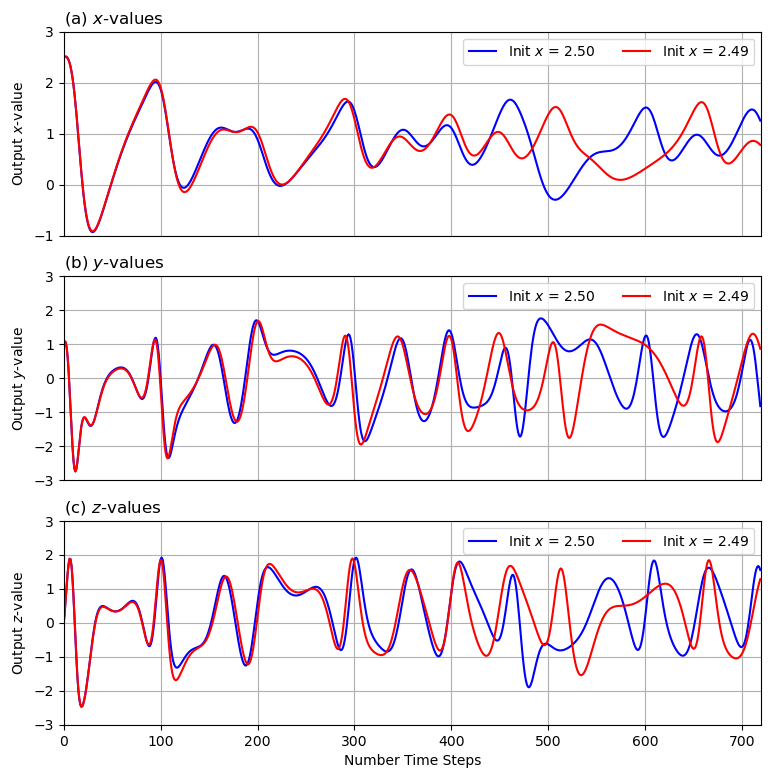

In [8]:
### Time to plot

# Will create a three-panel plot:
## - Panel (a): x-values
## - Panel (b): y-values
## - Panel (c): z-values

# Make an array
x_axis = np.arange(0,720,1)

fig = plt.figure(figsize = (9,9))

# Plot x-values
ax1 = fig.add_subplot(311)
ax1.plot(x_axis, x_1, color = 'blue', label = 'Init $x$ = 2.50')
ax1.plot(x_axis, x_2, color = 'red', label = 'Init $x$ = 2.49')
ax1.grid(True)
plt.xlim(0, 720)
plt.ylim(-1, 3)
plt.ylabel('Output $x$-value')
plt.title('(a) $x$-values', loc = 'left')
plt.legend(loc = 'upper right', ncol= 2)

plt.tick_params(axis = 'x',
               which = 'both',
               bottom = False,
               top = False,
               labelbottom = False)

# Plot y-values
ax2 = fig.add_subplot(312)
ax2.plot(x_axis, y_1, color = 'blue', label = 'Init $x$ = 2.50')
ax2.plot(x_axis, y_2, color = 'red', label = 'Init $x$ = 2.49')
ax2.grid(True)
plt.xlim(0, 720)
plt.ylim(-3, 3)
plt.ylabel('Output $y$-value')
plt.title('(b) $y$-values', loc = 'left')
plt.legend(loc = 'upper right', ncol = 2)

plt.tick_params(axis = 'x',
               which = 'both',
               bottom = False,
               top = False,
               labelbottom = False)

# Plot z-values
ax3 = fig.add_subplot(313)
ax3.plot(x_axis, z_1, color = 'blue', label = 'Init $x$ = 2.50')
ax3.plot(x_axis, z_2, color = 'red', label = 'Init $x$ = 2.49')
ax3.grid(True)
plt.xlim(0, 720)
plt.ylim(-3, 3)
plt.xlabel('Number Time Steps')
plt.ylabel('Output $z$-value')
plt.title('(c) $z$-values', loc = 'left')
plt.legend(loc = 'upper right', ncol = 2)

plt.savefig('Sczepanski_ATSC528_Lab4_plots.png', dpi = 250)

In [ ]:
### In a separte text file (or below), provide a discussion of your results ###
### Make sure to answer the following questions in your discussion          ###
### 1 - Are the two simulations the same throughout the entire period?      ###
###     If not, when do they diverge?                                       ###
### 2 - If the ending points are different, what does this say regarding    ###
###     the importance of providing NWP models, assuming this serves as a   ###
###     proxy for one, with accurate and balanced initial conditions?       ###
'''
    

'''